Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      1.00      0.80       200
         1.0       0.00      0.00      0.00       100

    accuracy                           0.67       300
   macro avg       0.33      0.50      0.40       300
weighted avg       0.44      0.67      0.53       300

Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


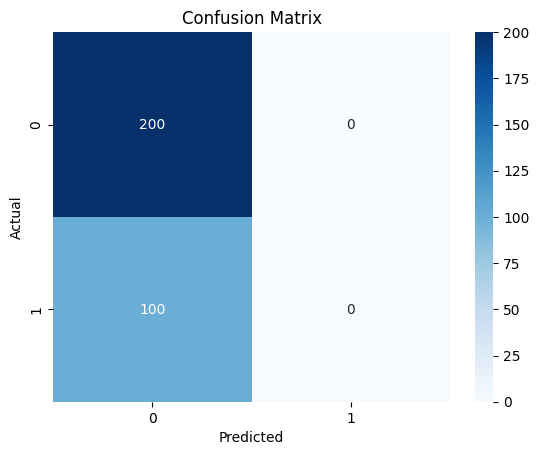

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as pl

np.random.seed(42)
n_samples = 1000

data = {
    'transaction_id': np.arange(1, n_samples + 1),
    'user_id': np.random.randint(100, 999, n_samples),
    'amount': np.random.exponential(scale=200, size=n_samples).round(2),
    'location': np.random.choice(['US', 'UK', 'CA', 'AU', 'IN'], n_samples),
    'device_type': np.random.choice(['Mobile', 'Desktop', 'Tablet'], n_samples),
    'is_foreign_transaction': np.random.choice([0, 1], n_samples, p=[0.85, 0.15]),
    'is_high_risk_country': np.random.choice([0, 1], n_samples, p=[0.9, 0.1]),
    'is_fraud': np.zeros(n_samples)
}

df = pd.DataFrame(data)

fraud_indices = df.sample(frac=0.1, random_state=42).index
df.loc[fraud_indices, 'is_fraud'] = 1

df_encoded = pd.get_dummies(df.drop(['transaction_id', 'user_id'], axis=1), drop_first=True)

X = df_encoded.drop('is_fraud', axis=1)
y = df_encoded['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()